Freshwater is one of our most vital and scarce natural resources, making up just 3% of the earth’s total water volume. It touches nearly every aspect of our daily lives, from drinking, swimming, and bathing to generating food, electricity, and the products we use every day. Access to a safe and sanitary water supply is essential not only to human life, but also to the survival of surrounding ecosystems that are experiencing the effects of droughts, pollution, and rising temperatures.  The dataset was used to check the suitability of water for consumption.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)



<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv('dataset.csv')  #import data

<IPython.core.display.Javascript object>

In [3]:
data.sample(10).T    #check data

,83867,484544,525967,79464,428770,527504,657557,548931,49368,404209
Index,83867,484544,525967,79464,428770,527504,657557,548931,49368,404209
pH,7.016139,7.913601,7.260569,7.392647,6.95314,7.35238,7.79071,7.893127,7.38384,7.337944
Iron,0.040121,0.030388,0.011445,0.236291,NaN,0.001323,0.010067,0.000019,0.011971,0.001343
Nitrate,7.846965,5.895549,7.980739,1.521226,4.997344,6.676923,6.142453,6.650805,2.004592,3.684336
Chloride,225.76796,233.393477,168.123528,161.465173,104.266154,246.412405,121.759583,141.777788,155.750028,188.950897
Lead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zinc,0.106777,0.007644,0.316766,2.239177,0.17771,0.162396,2.439053,1.151752,0.901389,0.55964
Color,Near Colorless,Near Colorless,Colorless,Light Yellow,Colorless,Colorless,Near Colorless,Colorless,Near Colorless,Near Colorless
Turbidity,0.011049,0.553609,0.359075,0.159372,0.000493,0.704724,0.490194,0.042031,0.009329,0.006963
Fluoride,1.594425,0.438756,0.613793,1.360386,0.479312,0.274028,1.175595,0.538137,0.311684,0.97504


<IPython.core.display.Javascript object>

In [4]:
data.shape   #Checking rows and columns

(693362, 24)

<IPython.core.display.Javascript object>

In [5]:
rows_with_all_nulls = data[data.isnull().all(axis=1)].sum()
rows_with_all_nulls 

Index                     0.0
pH                        0.0
Iron                      0.0
Nitrate                   0.0
Chloride                  0.0
Lead                      0.0
Zinc                      0.0
Color                     0.0
Turbidity                 0.0
Fluoride                  0.0
Copper                    0.0
Odor                      0.0
Sulfate                   0.0
Conductivity              0.0
Chlorine                  0.0
Manganese                 0.0
Total Dissolved Solids    0.0
Source                    0.0
Water Temperature         0.0
Air Temperature           0.0
Month                     0.0
Day                       0.0
Time of Day               0.0
Target                    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [6]:
data.isnull().sum()

Index                         0
pH                        13443
Iron                       4673
Nitrate                   12331
Chloride                  20400
Lead                       3069
Zinc                      18276
Color                       642
Turbidity                  5714
Fluoride                  22047
Copper                    23130
Odor                      20732
Sulfate                   22887
Conductivity              19110
Chlorine                   6732
Manganese                 12800
Total Dissolved Solids      192
Source                    10227
Water Temperature         19575
Air Temperature            3496
Month                     11214
Day                       11741
Time of Day               13486
Target                        1
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
data.info()  #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693362 entries, 0 to 693361
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   693362 non-null  int64  
 1   pH                      679919 non-null  float64
 2   Iron                    688689 non-null  float64
 3   Nitrate                 681031 non-null  float64
 4   Chloride                672962 non-null  float64
 5   Lead                    690293 non-null  float64
 6   Zinc                    675086 non-null  float64
 7   Color                   692720 non-null  object 
 8   Turbidity               687648 non-null  float64
 9   Fluoride                671315 non-null  float64
 10  Copper                  670232 non-null  float64
 11  Odor                    672630 non-null  float64
 12  Sulfate                 670475 non-null  float64
 13  Conductivity            674252 non-null  float64
 14  Chlorine            

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# checking the number of unique values
data["Index"].nunique()


693362

<IPython.core.display.Javascript object>

In [10]:
data.drop(['Index'], axis = 1, inplace = True)  # Droppoing index columns

<IPython.core.display.Javascript object>

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,679919.0,7.449897,0.839821,2.058008e+00,6.918663e+00,7.452663e+00,7.997972e+00,12.891960
Iron,688689.0,0.111655,0.439259,2.047587e-53,8.822204e-06,2.026422e-03,4.909534e-02,15.748603
Nitrate,681031.0,6.056116,3.106968,3.830197e-01,3.943903e+00,5.550088e+00,7.566169e+00,69.731244
Chloride,672962.0,181.364723,65.150297,3.220377e+01,1.372904e+02,1.744785e+02,2.151043e+02,1430.548852
Lead,690293.0,0.001260,0.030442,0.000000e+00,5.626194e-123,1.561949e-62,2.824722e-27,3.503948
Zinc,675086.0,1.523704,1.497457,6.838486e-07,4.112822e-01,1.071681e+00,2.209401e+00,28.368672
Turbidity,687648.0,0.476676,0.848328,1.410450e-14,3.675711e-02,1.988272e-01,5.880970e-01,18.778916
Fluoride,671315.0,0.935559,0.783084,4.550148e-06,3.700420e-01,7.628986e-01,1.313202e+00,12.851710
Copper,670232.0,0.489363,0.558299,2.099226e-09,1.259791e-01,3.375843e-01,6.748833e-01,11.390555
Odor,672630.0,1.767134,1.047460,1.100125e-02,8.747391e-01,1.739745e+00,2.604929e+00,4.141991


<IPython.core.display.Javascript object>

The following features have standard deviation less than 0.1 and can be dropped

In [12]:
data.drop(['Lead'], axis = 1, inplace = True)  # Dropping lead, standard deviation less than threshold

<IPython.core.display.Javascript object>

__Let's check the count of each unique category in each of the categorical variables__

In [13]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

cat_col

['Color', 'Source', 'Month']

<IPython.core.display.Javascript object>

In [14]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" *50)

Near Colorless    216968
Colorless         216964
Faint Yellow      124396
Light Yellow       81241
Yellow             53151
Name: Color, dtype: int64
--------------------------------------------------
Well         85808
Aquifer      85785
Stream       85662
Ground       85618
River        85194
Lake         85131
Reservoir    84983
Spring       84954
Name: Source, dtype: int64
--------------------------------------------------
January      58286
August       58148
March        57927
May          57901
October      57816
July         57674
December     57571
April        56271
November     56144
June         56032
September    55861
February     52517
Name: Month, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [15]:
data[cat_col] = data[cat_col].astype('category') #Changing object type to categorical type

<IPython.core.display.Javascript object>

In [16]:
# Extracting all float dtypes
num_col = list(data.select_dtypes("float").columns)

num_col

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Day',
 'Time of Day',
 'Target']

<IPython.core.display.Javascript object>

In [17]:
for column in num_col:
    print(data[column].value_counts())
    print("-" *50)

8.031315    2
8.304057    2
7.044077    2
7.942236    2
7.544993    2
           ..
7.336418    1
7.381775    1
7.773989    1
7.240402    1
7.124560    1
Name: pH, Length: 664134, dtype: int64
--------------------------------------------------
5.782176e-01    2
3.496789e-01    2
3.483407e-04    2
8.103819e-03    2
6.440777e-02    2
               ..
2.345304e-05    1
1.027045e-10    1
7.134067e-05    1
3.864653e-05    1
6.087416e-08    1
Name: Iron, Length: 672522, dtype: int64
--------------------------------------------------
1.879122     2
12.974167    2
6.146648     2
4.264714     2
9.138871     2
            ..
9.245221     1
3.257962     1
4.982339     1
5.377152     1
10.239634    1
Name: Nitrate, Length: 665214, dtype: int64
--------------------------------------------------
198.142368    2
261.272894    2
163.252648    2
197.132289    2
233.748446    2
             ..
173.538049    1
207.786746    1
140.245929    1
211.153921    1
191.680533    1
Name: Chloride, Length: 657530

<IPython.core.display.Javascript object>

In [18]:
data.head()

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,8.332988,0.000083,8.605777,122.799772,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0.0
1,6.917863,0.000081,3.734167,227.029851,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0.0
2,5.443762,0.020106,3.816994,230.995630,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0.0
3,7.955339,0.143988,8.224944,178.129940,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,237.028467,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0.0
4,8.091909,0.002167,9.925788,186.540872,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0.0


<IPython.core.display.Javascript object>

__Univariate Analysis__

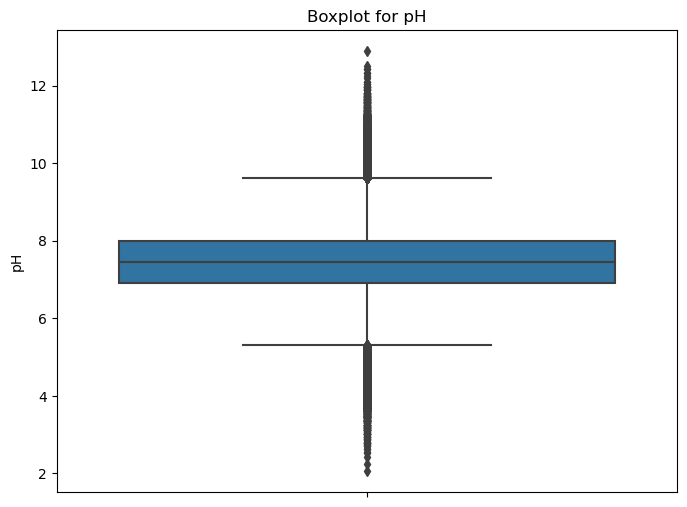

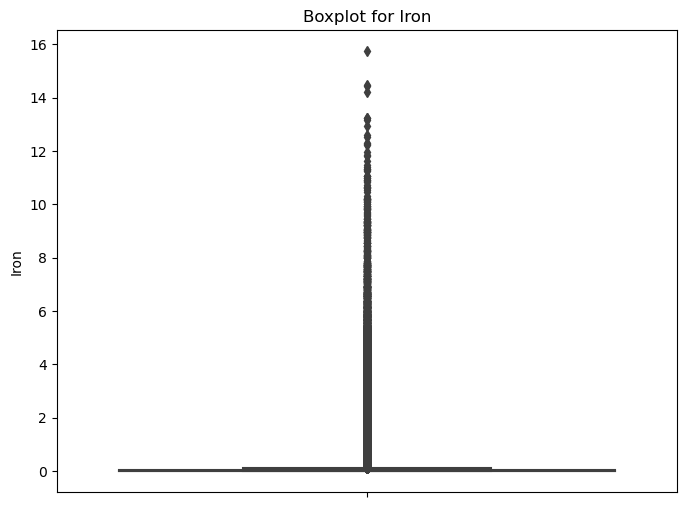

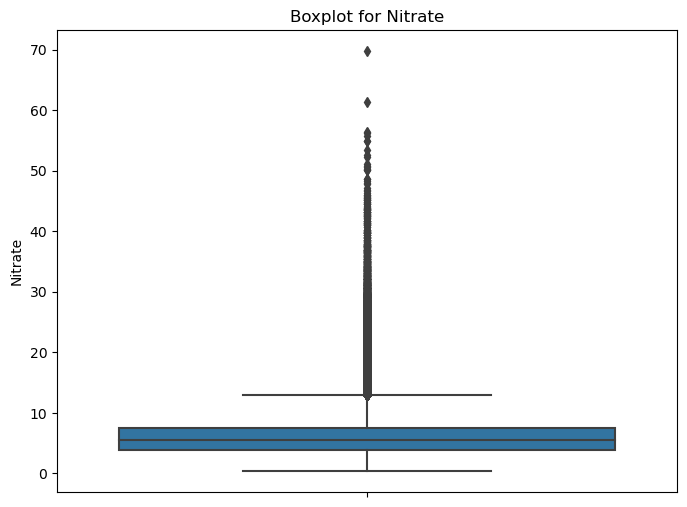

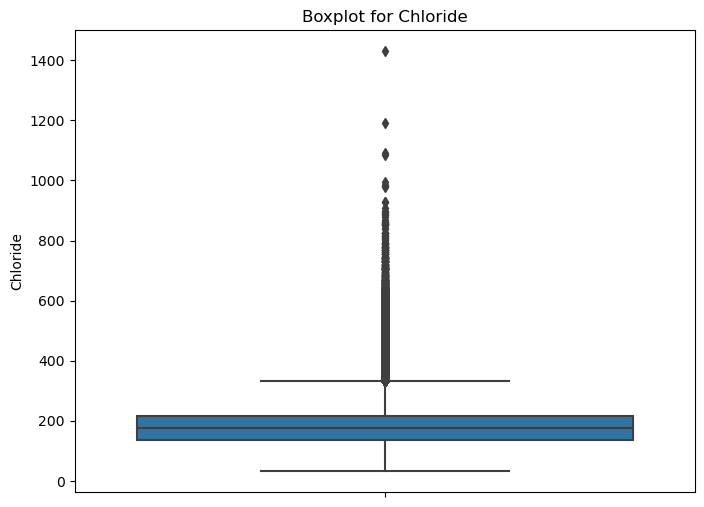

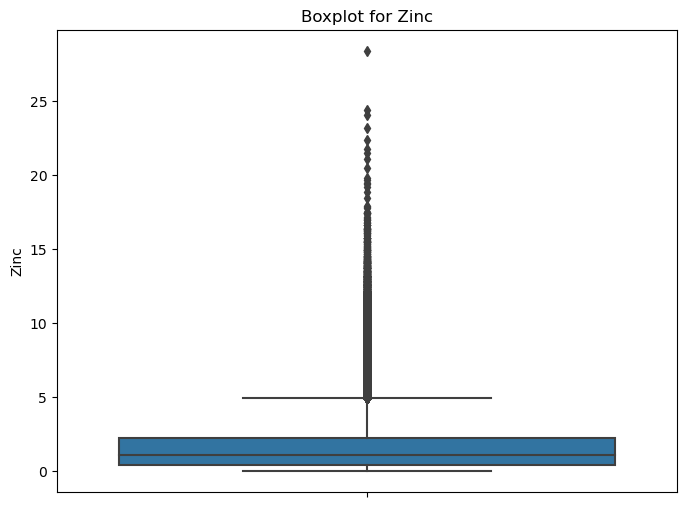

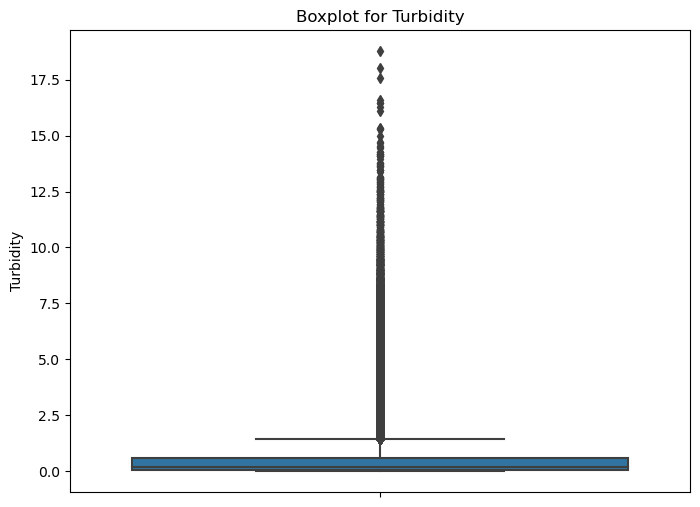

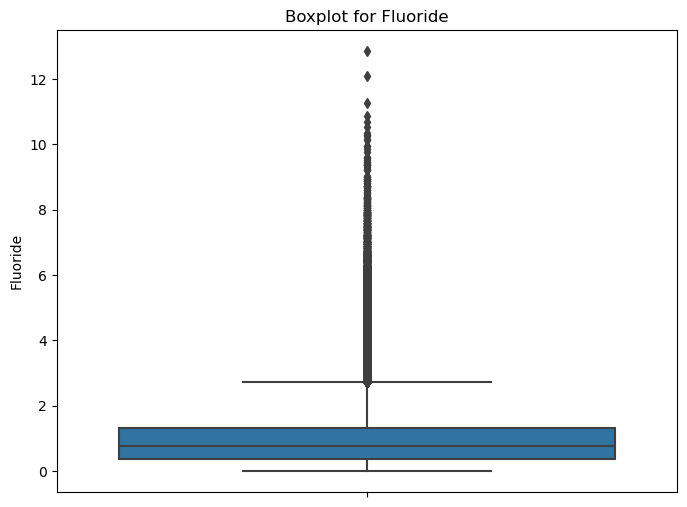

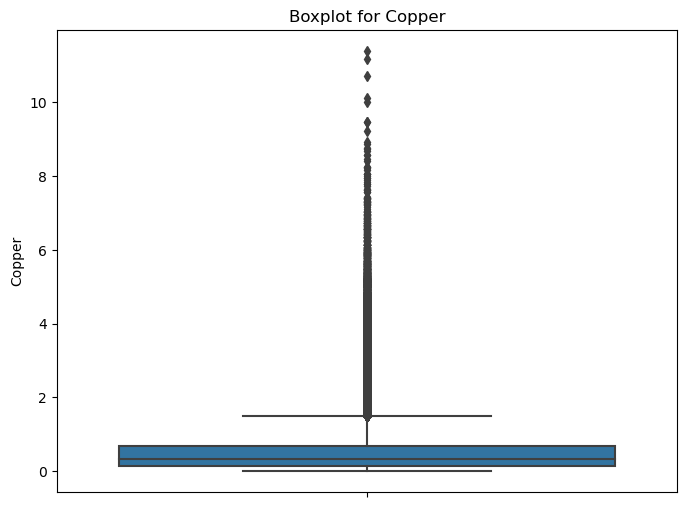

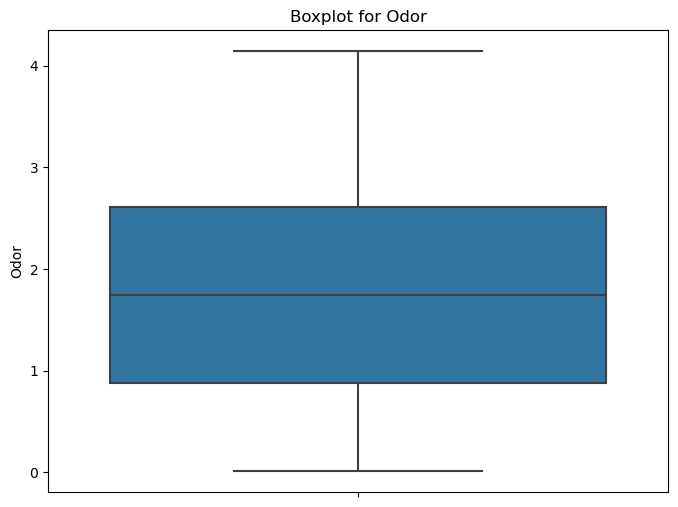

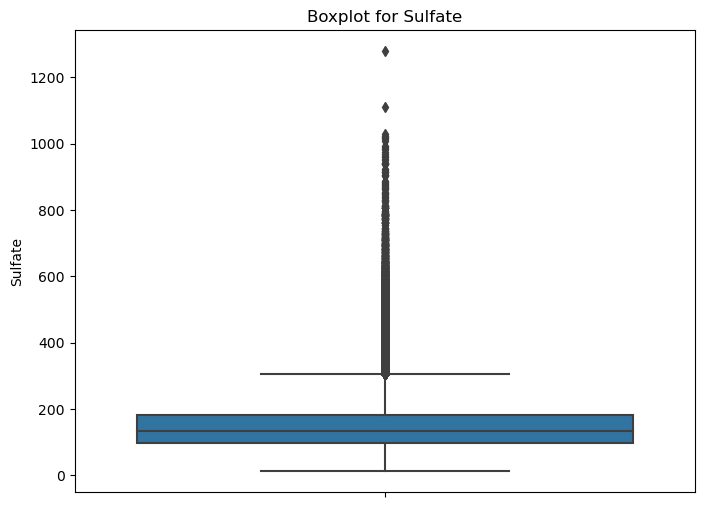

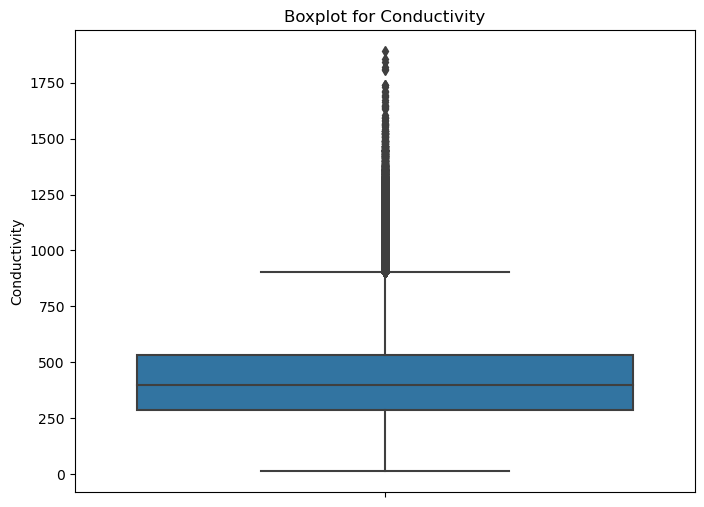

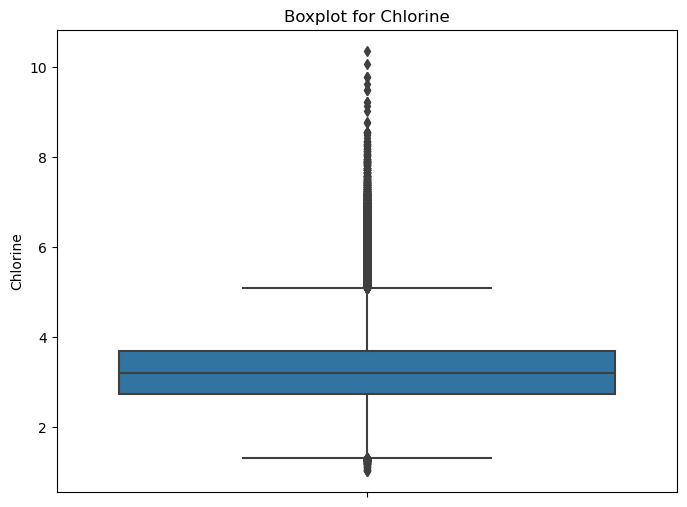

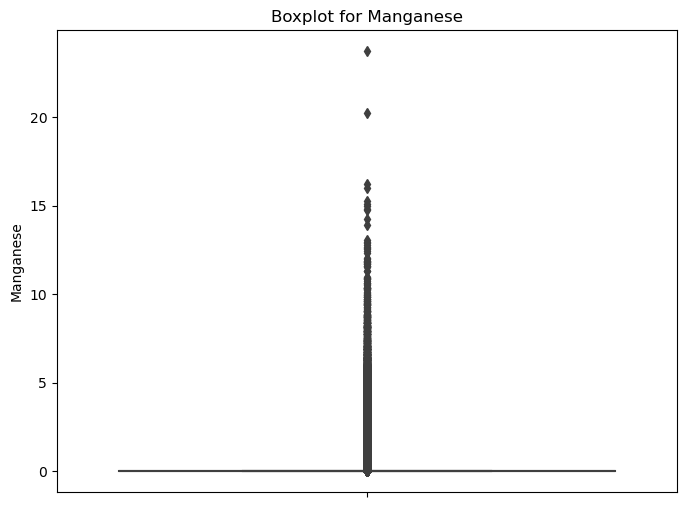

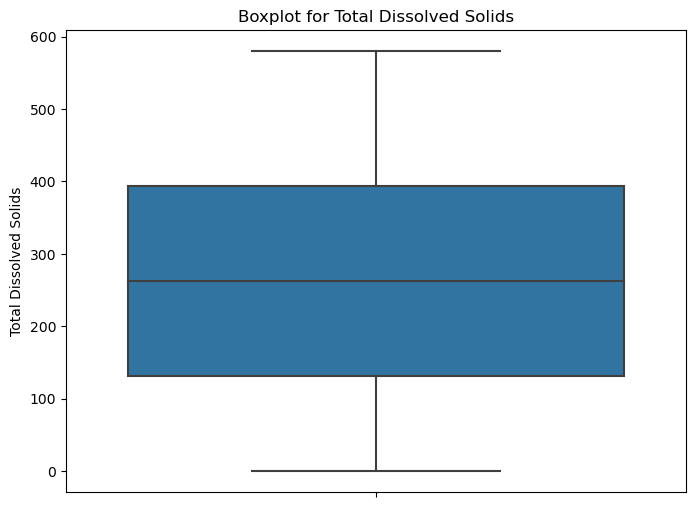

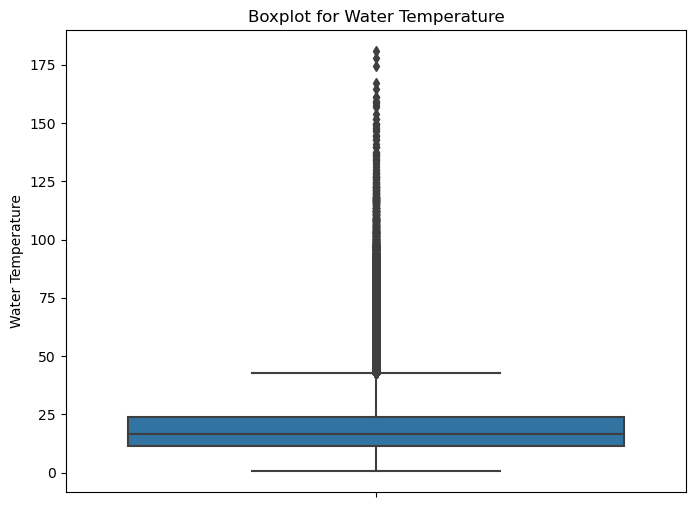

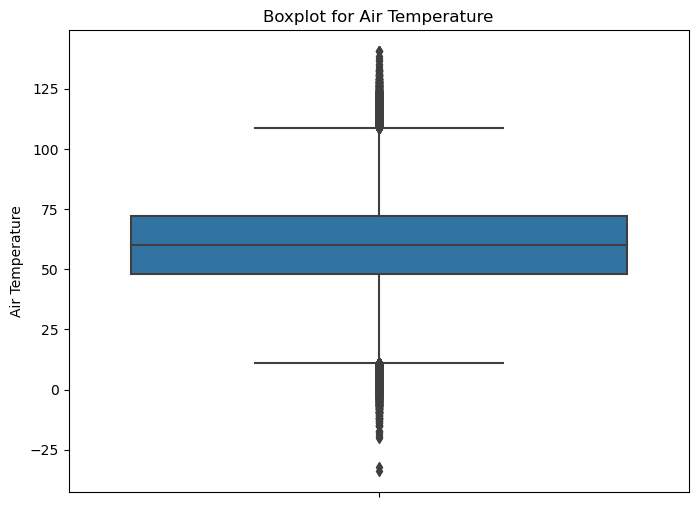

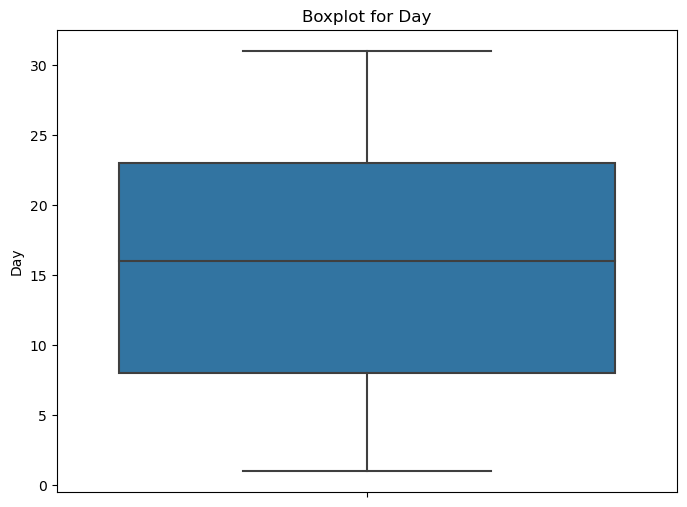

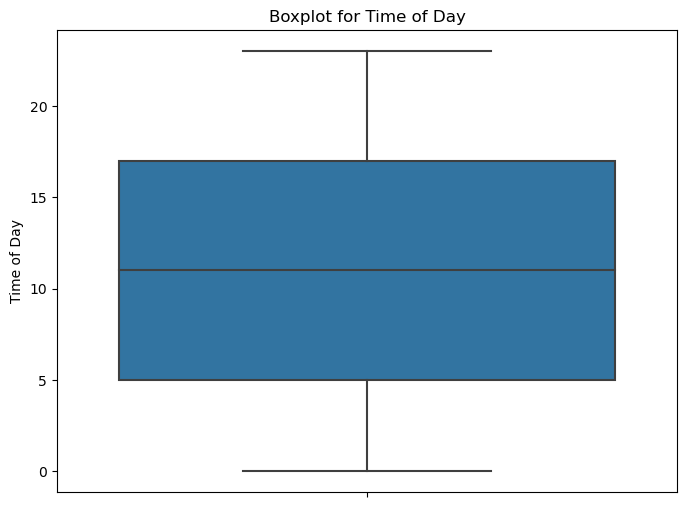

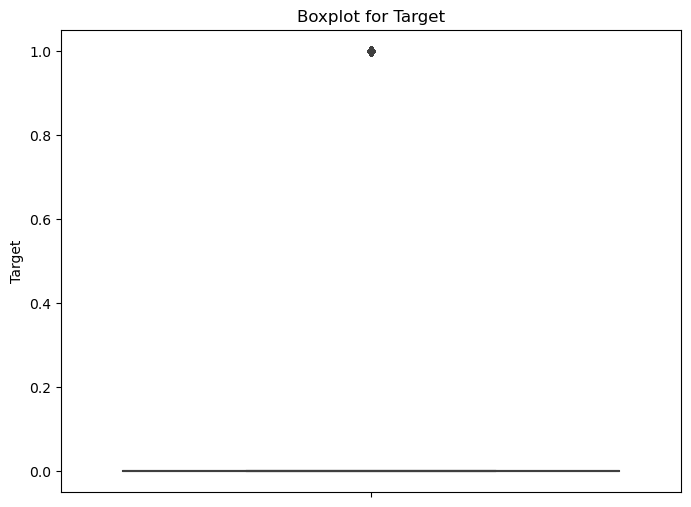

<IPython.core.display.Javascript object>

In [19]:
#Checking distribution of numerical data types
for column in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.show()

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

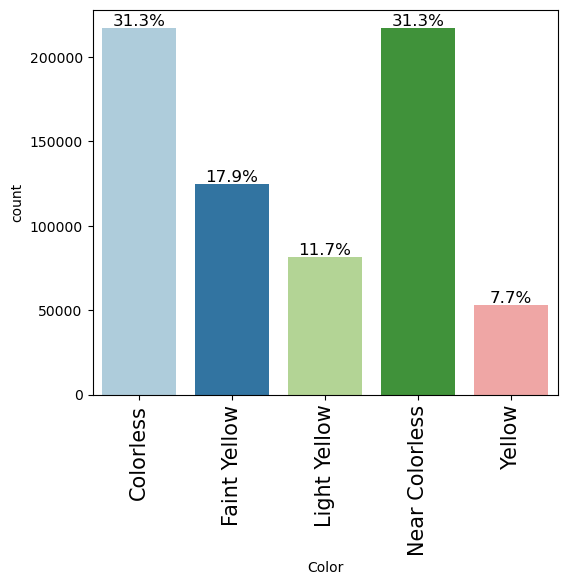

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "Color", perc=True)

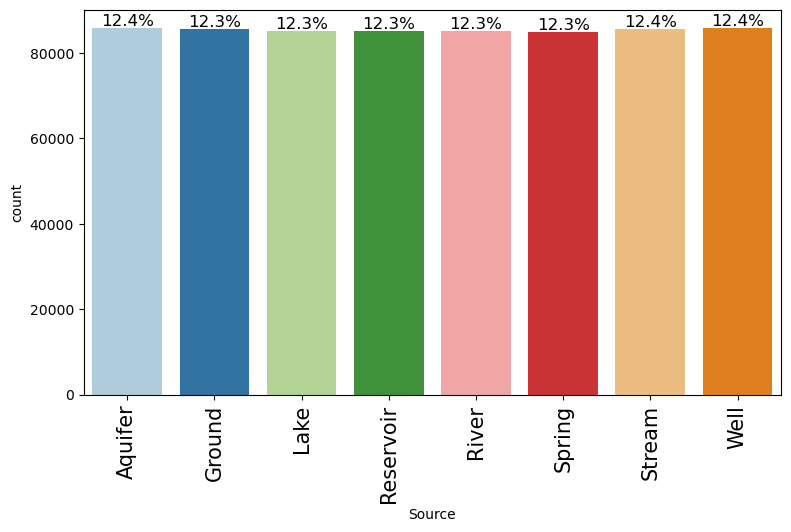

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "Source", perc=True)

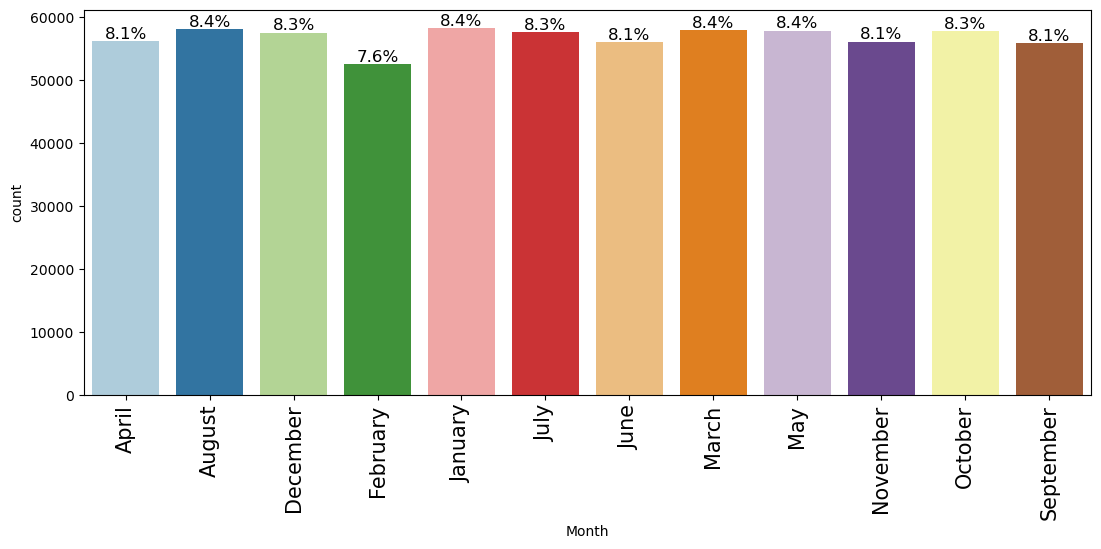

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Month", perc=True)

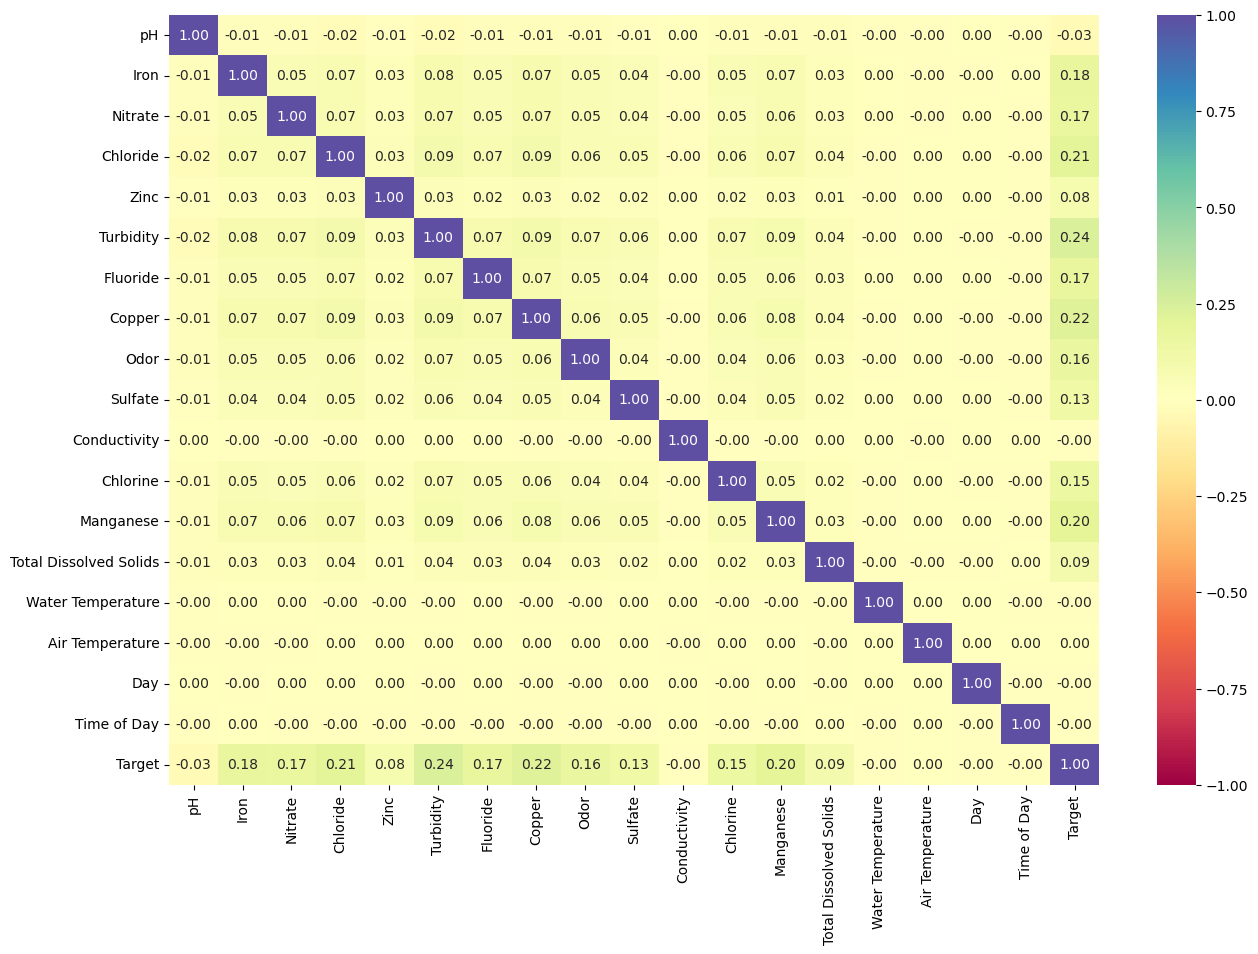

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [25]:
# Calculate the correlation matrix
correlation_matrix = data[num_col].corr()

correlation_threshold = 0.01

# Select columns where absolute correlation with 'target' is greater than the threshold
selected_columns = correlation_matrix.columns[abs(correlation_matrix['Target']) > correlation_threshold]

# Create a new DataFrame with columns that were not selected
not_selected_columns = data[num_col].columns.difference(selected_columns)
print(not_selected_columns)

Index(['Air Temperature', 'Conductivity', 'Day', 'Time of Day',
       'Water Temperature'],
      dtype='object')


<IPython.core.display.Javascript object>

In [26]:
filtered_data = data.drop(columns=not_selected_columns)

<IPython.core.display.Javascript object>

In [27]:
filtered_data.head(5)

,pH,Iron,Nitrate,Chloride,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Source,Month,Target
0,8.332988,0.000083,8.605777,122.799772,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,NaN,January,0.0
1,6.917863,0.000081,3.734167,227.029851,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,Lake,November,0.0
2,5.443762,0.020106,3.816994,230.995630,0.528280,Light Yellow,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,River,January,0.0
3,7.955339,0.143988,8.224944,178.129940,4.027879,Near Colorless,0.166319,0.208454,0.239451,NaN,147.163233,3.516907,2.468295e-02,100.043838,Ground,April,0.0
4,8.091909,0.002167,9.925788,186.540872,3.807511,Light Yellow,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,Spring,June,0.0


<IPython.core.display.Javascript object>

__Data Preparation Modeling__

In [29]:
filtered_data['Target'].value_counts() 

0.0    543933
1.0    149428
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

The Target value is binary and imbalanced

In [30]:
data1 = filtered_data.fillna(data.median())

<IPython.core.display.Javascript object>

In [31]:
X = data1.drop(["Target"], axis=1)
Y = data1["Target"]

X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [33]:
X

,pH,Iron,Nitrate,Chloride,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,8.332988,8.347252e-05,8.605777,122.799772,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6.917863,8.053827e-05,3.734167,227.029851,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5.443762,2.010586e-02,3.816994,230.995630,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,7.955339,1.439878e-01,8.224944,178.129940,4.027879,0.166319,0.208454,0.239451,1.739745,147.163233,3.516907,2.468295e-02,100.043838,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.091909,2.167128e-03,9.925788,186.540872,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693357,8.806909,1.021850e-06,3.912829,153.930086,2.465556,2.706223,3.331593,0.839904,1.111508,230.465281,3.379626,1.441614e-03,351.157474,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
693358,8.763859,5.000373e-02,3.213068,179.661005,1.862360,0.673730,1.484464,0.311169,3.919799,434.347529,2.914163,2.511371e-01,44.159326,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
693359,6.276814,1.439138e-01,7.331801,142.420940,1.389082,0.288363,0.738405,0.106706,2.612391,221.129966,3.627675,9.876565e-05,112.573505,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
693360,7.314082,5.150552e-02,15.462500,94.077252,1.071681,1.815221,0.877268,0.187045,0.095292,106.786296,3.673969,6.689053e-05,238.583592,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [34]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [35]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [36]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [37]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 104600
Before OverSampling, count of label '0': 380753 

After OverSampling, count of label '1': 152301
After OverSampling, count of label '0': 380753 

After OverSampling, the shape of train_X: (533054, 35)
After OverSampling, the shape of train_y: (533054,) 



<IPython.core.display.Javascript object>

__Feature Scaling__

In [38]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [39]:
#create the object of StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train_over)
X_test=sc.fit_transform(X_test)

<IPython.core.display.Javascript object>

__Artificial Neuron Network__

In [40]:
#First we will intialize the ANN
import tensorflow as tf
ann=tf.keras.models.Sequential()


<IPython.core.display.Javascript object>

__Add the input and hidden layer__

In [41]:
ann.add(tf.keras.layers.Dense(units=6,activation='sigmoid'))

<IPython.core.display.Javascript object>

__Second Hidden Layer__

In [42]:
ann.add(tf.keras.layers.Dense(units=6,activation='sigmoid'))

<IPython.core.display.Javascript object>

__Outer Layer__

In [43]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

<IPython.core.display.Javascript object>

__Compilint Ann__

In [44]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

<IPython.core.display.Javascript object>

__Training On Our DataSet__

In [45]:
ann.fit(X_train,y_train_over,batch_size=50,epochs=200)

Epoch 1/200
10662/10662 [==============================] - 13s 1ms/step - loss: 0.3799 - accuracy: 0.8305
Epoch 2/200
10662/10662 [==============================] - 12s 1ms/step - loss: 0.3428 - accuracy: 0.8476
Epoch 3/200
10662/10662 [==============================] - 12s 1ms/step - loss: 0.3370 - accuracy: 0.8499
Epoch 4/200
10662/10662 [==============================] - 12s 1ms/step - loss: 0.3344 - accuracy: 0.8510
Epoch 5/200
10662/10662 [==============================] - 12s 1ms/step - loss: 0.3327 - accuracy: 0.8519
Epoch 6/200
10662/10662 [==============================] - 18s 2ms/step - loss: 0.3311 - accuracy: 0.8526
Epoch 7/200
10662/10662 [==============================] - 17s 2ms/step - loss: 0.3283 - accuracy: 0.8532
Epoch 8/200
10662/10662 [==============================] - 12s 1ms/step - loss: 0.3209 - accuracy: 0.8539
Epoch 9/200
10662/10662 [==============================] - 13s 1ms/step - loss: 0.3154 - accuracy: 0.8536
Epoch 10/200
10662/10662 [====================

<IPython.core.display.Javascript object>

__check the model with our testing data__

In [48]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

6501/6501 [==============================] - 6s 751us/step


<IPython.core.display.Javascript object>

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[136915  26266]
 [  5807  39021]]


0.8458095563172747

<IPython.core.display.Javascript object>

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90    163181
         1.0       0.60      0.87      0.71     44828

    accuracy                           0.85    208009
   macro avg       0.78      0.85      0.80    208009
weighted avg       0.88      0.85      0.85    208009



<IPython.core.display.Javascript object>

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

Epoch 1/100
10662/10662 [==============================] - 16s 1ms/step - loss: 0.2922 - accuracy: 0.8622
Epoch 2/100
10662/10662 [==============================] - 14s 1ms/step - loss: 0.2922 - accuracy: 0.8622
Epoch 3/100
10662/10662 [==============================] - 18s 2ms/step - loss: 0.2923 - accuracy: 0.8621
Epoch 4/100
10662/10662 [==============================] - 14s 1ms/step - loss: 0.2923 - accuracy: 0.8621
Epoch 5/100
10662/10662 [==============================] - 14s 1ms/step - loss: 0.2922 - accuracy: 0.8622
Epoch 6/100
10662/10662 [==============================] - 14s 1ms/step - loss: 0.2922 - accuracy: 0.8623
Epoch 7/100
10662/10662 [==============================] - 14s 1ms/step - loss: 0.2922 - accuracy: 0.8622
Epoch 8/100
10662/10662 [==============================] - 18s 2ms/step - loss: 0.2921 - accuracy: 0.8622
Epoch 9/100
10662/10662 [==============================] - 13s 1ms/step - loss: 0.2922 - accuracy: 0.8622
Epoch 10/100
10662/10662 [====================

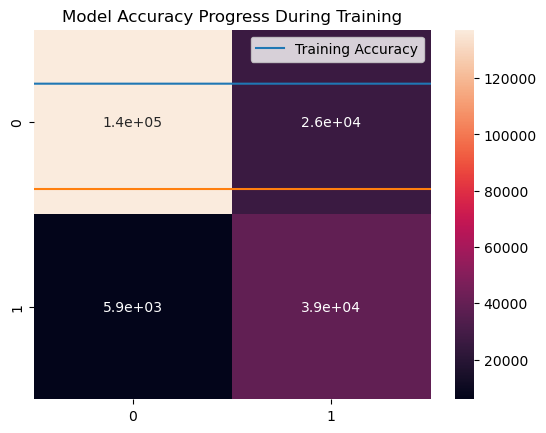

<IPython.core.display.Javascript object>

In [52]:
epochs_hist = ann.fit(X_train, y_train_over, epochs = 100, batch_size = 50)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

y_pred

epochs_hist.history.keys()

plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

In [52]:
# Assuming 'ann' is your trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(ann, file)


<IPython.core.display.Javascript object>

In [53]:
# Load the saved model from the file
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use 'loaded_model' to make predictions
loaded_predictions = loaded_model.predict(X_test)


6501/6501 [==============================] - 5s 690us/step


<IPython.core.display.Javascript object>